<a href="https://colab.research.google.com/github/Sonarajan04/image_classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from sklearn.svm import SVC
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
os.listdir('/content/drive/MyDrive/Data')

['Cat', 'Dog']

In [4]:
os.listdir('/content/drive/MyDrive/Data/Cat')

['images9.jpeg',
 'images(1).jpeg',
 'downloadcat(1).jpeg',
 'download8.jpeg',
 'download7.jpeg',
 'download6.jpeg',
 'download5.jpeg',
 'download4.jpeg',
 'download3.jpeg',
 'download2.jpeg',
 'download1.jpeg',
 'download.jpeg',
 'cat.54.jpg',
 'cat.53.jpg',
 'cat.52.jpg',
 'cat.51.jpg',
 'cat.50.jpg',
 'cat.49.jpg',
 'cat.48.jpg',
 'cat.47.jpg',
 'cat.46.jpg',
 'cat.44.jpg',
 'cat.43.jpg',
 'cat.42.jpg',
 'cat.41.jpg',
 'cat.40.jpg',
 'cat.39.jpg',
 'cat.38.jpg',
 'cat.37.jpg',
 'cat.36.jpg',
 'cat.35.jpg',
 'cat.34.jpg',
 'cat.33.jpg',
 'cat.32.jpg',
 'cat.31.jpg',
 'cat.30.jpg',
 'cat.29.jpg',
 'cat.28.jpg',
 'cat.27.jpg',
 'cat.24.jpg',
 'cat.21.jpg',
 'cat.20.jpg',
 'cat.18.jpg',
 'cat.17.jpg',
 'cat.16.jpg',
 'cat.15.jpg',
 'cat.14.jpg',
 'cat.13.jpg',
 'cat.12.jpg',
 'cat.11.jpg',
 'cat.10.jpg',
 'cat.9.jpg',
 'cat.8.jpg',
 'cat.7.jpg',
 'cat.5.jpg',
 'cat.5 - Copy.jpg',
 'cat.4 - Copy.jpg',
 'cat.3 - Copy.jpg',
 'cat.2 - Copy.jpg',
 'cat.1 - Copy.jpg']

In [5]:
len(os.listdir('/content/drive/MyDrive/Data/Cat'))

60

In [6]:
os.listdir('/content/drive/MyDrive/Data/Dog')

['images1.jpeg',
 'images(2).jpeg',
 'download8(1).jpeg',
 'download7(1).jpeg',
 'download6(1).jpeg',
 'download5(1).jpeg',
 'download4(1).jpeg',
 'download3(1).jpeg',
 'download2(1).jpeg',
 'download1(1).jpeg',
 'dog.82.jpg',
 'dog.81.jpg',
 'dog.80.jpg',
 'dog.79.jpg',
 'dog.78.jpg',
 'dog.77.jpg',
 'dog.76.jpg',
 'dog.71.jpg',
 'dog.70.jpg',
 'dog.69.jpg',
 'dog.68.jpg',
 'dog.67.jpg',
 'dog.66.jpg',
 'dog.65.jpg',
 'dog.64.jpg',
 'dog.63.jpg',
 'dog.61.jpg',
 'dog.60.jpg',
 'dog.58.jpg',
 'dog.57.jpg',
 'dog.56.jpg',
 'dog.55.jpg',
 'dog.51.jpg',
 'dog.48.jpg',
 'dog.47.jpg',
 'dog.46.jpg',
 'dog.45.jpg',
 'dog.44.jpg',
 'dog.42.jpg',
 'dog.40.jpg',
 'dog.39.jpg',
 'dog.38.jpg',
 'dog.36.jpg',
 'dog.35.jpg',
 'dog.34.jpg',
 'dog.33.jpg',
 'dog.32.jpg',
 'dog.31.jpg',
 'dog.30.jpg',
 'dog.28.jpg',
 'dog.27.jpg',
 'dog.26.jpg',
 'dog.25.jpg',
 'dog.24.jpg',
 'dog.23.jpg',
 'dog.22.jpg',
 'dog.21.jpg',
 'dog.20.jpg',
 'dog.19.jpg',
 'dog.18.jpg',
 'dog.17.jpg',
 'dog.16.jpg',
 'dog.15

In [7]:
len(os.listdir('/content/drive/MyDrive/Data/Dog'))

66

In [8]:
#to read the images

In [9]:
datapath='/content/drive/MyDrive/Data'
sub_fol=os.listdir(datapath)
print(sub_fol)

['Cat', 'Dog']


In [10]:
for fol in sub_fol:
  image_fol_path=os.path.join(datapath,fol)
  print(image_fol_path)
  images=os.listdir(image_fol_path)
  print(images)
  for img in images:
    img_path=os.path.join(image_fol_path,img)
    print(img_path)

/content/drive/MyDrive/Data/Cat
['images9.jpeg', 'images(1).jpeg', 'downloadcat(1).jpeg', 'download8.jpeg', 'download7.jpeg', 'download6.jpeg', 'download5.jpeg', 'download4.jpeg', 'download3.jpeg', 'download2.jpeg', 'download1.jpeg', 'download.jpeg', 'cat.54.jpg', 'cat.53.jpg', 'cat.52.jpg', 'cat.51.jpg', 'cat.50.jpg', 'cat.49.jpg', 'cat.48.jpg', 'cat.47.jpg', 'cat.46.jpg', 'cat.44.jpg', 'cat.43.jpg', 'cat.42.jpg', 'cat.41.jpg', 'cat.40.jpg', 'cat.39.jpg', 'cat.38.jpg', 'cat.37.jpg', 'cat.36.jpg', 'cat.35.jpg', 'cat.34.jpg', 'cat.33.jpg', 'cat.32.jpg', 'cat.31.jpg', 'cat.30.jpg', 'cat.29.jpg', 'cat.28.jpg', 'cat.27.jpg', 'cat.24.jpg', 'cat.21.jpg', 'cat.20.jpg', 'cat.18.jpg', 'cat.17.jpg', 'cat.16.jpg', 'cat.15.jpg', 'cat.14.jpg', 'cat.13.jpg', 'cat.12.jpg', 'cat.11.jpg', 'cat.10.jpg', 'cat.9.jpg', 'cat.8.jpg', 'cat.7.jpg', 'cat.5.jpg', 'cat.5 - Copy.jpg', 'cat.4 - Copy.jpg', 'cat.3 - Copy.jpg', 'cat.2 - Copy.jpg', 'cat.1 - Copy.jpg']
/content/drive/MyDrive/Data/Cat/images9.jpeg
/conte

In [11]:
#to get the path of each images

In [12]:
#images=os.listdir(image_fol_path)
#print(images)

In [13]:
#to get each images
#for img in images:
#    img_path=os.path.join(image_fol_path,img)

In [14]:
data_arr=[]
target=[]
categories=['Cat','Dog']
datadir='/content/drive/MyDrive/Data'

In [15]:
for i in categories:
  print('loading category...',i)
  path=os.path.join(datadir,i)
  print(path)
  images=os.listdir(path)
  for img in images:
    img_path=os.path.join(path,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,3))
    data_arr.append(img_resized.flatten())
    target.append(categories.index(i))
  print('category',i,'loaded')

loading category... Cat
/content/drive/MyDrive/Data/Cat
category Cat loaded
loading category... Dog
/content/drive/MyDrive/Data/Dog
category Dog loaded


In [16]:
150*150*3

67500

In [17]:
df=pd.DataFrame(data_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.984314,0.847059,0.831373,0.984314,0.847059,0.831373,0.984314,0.847059,0.831373,0.984314,...,0.910501,0.941355,0.890196,0.917647,0.941267,0.890287,0.917738,0.945060,0.894079,0.921530
1,0.866723,0.937311,0.976527,0.871291,0.941879,0.981095,0.877716,0.948305,0.987520,0.881308,...,0.203221,0.289858,0.231564,0.157584,0.345476,0.294443,0.227843,0.353565,0.302585,0.239783
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.848055,0.828447,0.702958,0.863485,0.843877,0.727211,0.891915,0.868386,0.768386,0.921326,...,0.713486,0.855894,0.804914,0.742168,0.887273,0.836293,0.773548,0.889495,0.838514,0.775769
4,0.507909,0.574576,0.370654,0.511348,0.578014,0.374093,0.518351,0.585018,0.381096,0.524984,...,0.539661,0.566272,0.534900,0.526384,0.562021,0.525112,0.515794,0.563843,0.528467,0.509106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.391491,0.419671,0.282772,0.385622,0.433520,0.286712,0.378182,0.455436,0.294385,0.325471,...,0.244040,0.386638,0.419167,0.324269,0.309277,0.339090,0.250009,0.270845,0.292507,0.207303
122,0.246750,0.255539,0.368698,0.262558,0.267077,0.373934,0.276302,0.273717,0.374262,0.281503,...,0.463472,0.455897,0.385309,0.432369,0.469203,0.398615,0.447326,0.480224,0.409636,0.464329
123,0.328198,0.358391,0.368452,0.325996,0.347217,0.355244,0.370052,0.384387,0.383478,0.383345,...,0.521430,0.398590,0.420453,0.447633,0.448195,0.466741,0.491439,0.532478,0.542804,0.542721
124,0.615686,0.647059,0.658824,0.615686,0.647059,0.658824,0.615686,0.647059,0.658824,0.615648,...,0.154498,0.376526,0.085354,0.136334,0.392032,0.101926,0.152860,0.405295,0.116949,0.167004


In [18]:
print(target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [19]:
X=np.array(data_arr)
y=np.array(target)

In [20]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
#machine learning

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [23]:
clf=SVC(kernel='poly')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score,classification_report

In [25]:
print(accuracy_score(y_test,y_pred))

0.6052631578947368


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.87      0.63        15
           1       0.83      0.43      0.57        23

    accuracy                           0.61        38
   macro avg       0.67      0.65      0.60        38
weighted avg       0.70      0.61      0.60        38



In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

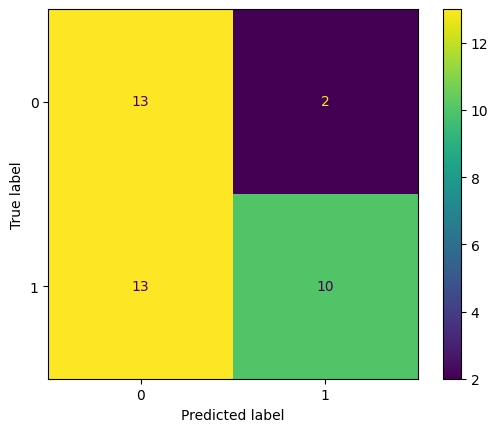

In [28]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [29]:
import matplotlib.pyplot as plt

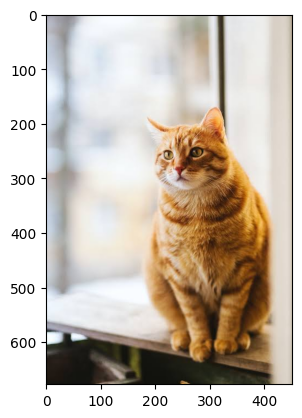

In [30]:
new_img=imread('/content/drive/MyDrive/images (4).jpeg')
plt.imshow(new_img)

In [31]:
X.shape

(126, 67500)

In [32]:
img=resize(new_img,(150,150,3)).flatten()

In [33]:
img.shape

(67500,)

In [34]:
img=img.reshape(1,-1)
img.shape

(1, 67500)

In [35]:
y_new=clf.predict(img)
y_new

array([0])

In [36]:
if y_new==0:
  print('cat')
else:
  print('dog')

cat


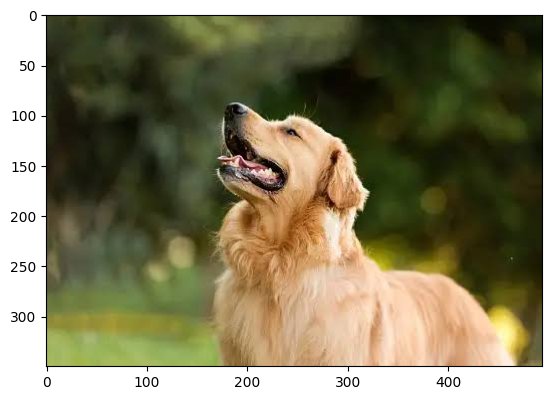

In [37]:
new_dog=imread('/content/drive/MyDrive/images (5).jpeg')
plt.imshow(new_dog)

In [38]:
img_dog=resize(new_dog,(150,150,3)).flatten()
img_dog.shape

(67500,)

In [39]:
img1=img_dog.reshape(1,-1)
img1.shape

(1, 67500)

In [40]:
y_dog=clf.predict(img1)
y_dog

array([0])

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1,n_estimators=100,criterion='entropy',max_depth=5)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=1)

In [42]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [43]:
print(accuracy_score(y_test,y_pred_rf))

0.5263157894736842


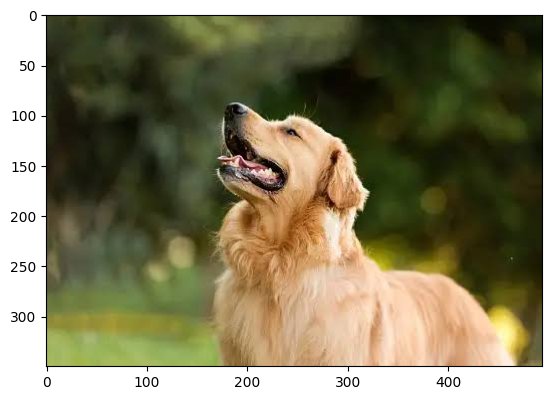

In [44]:
y_dog=imread('/content/drive/MyDrive/images (5).jpeg')
plt.imshow(y_dog)

In [45]:
img2=resize(y_dog,(150,150,3)).flatten()
img2.shape

(67500,)

In [46]:
img=img2.reshape(1,-1)
img.shape

(1, 67500)

In [47]:
y_dog_rf=rf.predict(img)
y_dog_rf

array([1])

In [48]:
if y_dog_rf==1:
  print('dog')
else:
  print('cat')

dog
